# Weather API
----

### Description  
*  Latitute and Longitute coordinates will be generated from random number generation 
*  Make citipy API calls based on the (lat, lng), and find at least 500 unique cities
*  For each city in the list, make OpenWeatherMap API call and obtain the current weather information 
       * organize result in DataFrame
       * store result in csv.
* Plot results based on the lattitude 
       * Temperature (F)
       * Humidity (%)
       * Cloudiness (%)
       * Wind Speed (mph)
       
### Data
* (Lat, Lng) corrdintates: from random number generation 
* City names: citipy API
* City weather: OpenWeatherMap API

### Conclusion: 
1. (`max Temperature (F)` vs. lattitude): In general, max temperature is `higher near the Equater` (as expeted). However,  
    * the temperature curve shifted right, meaning the `temperature is `**`higher`**` in the Northern Hemisphere`. 
    * the `temperature difference` between the `Northern` and `Southern Hemisphere` **`increases`** as the absolute lattitude increases  
    
    
2. (`Humidity (%)` vs. Lattitude): Overall, the humidity is relatively high globally:  
    * With an average ~ 60%
    * Within the ~500 cities found, only ~20 cities have humidity less than 20%
    
      
3. `Cloudiness` is distributed relativly evenly, with many cities either having 0% (sunny) or 100% cloudiness

  
4. (`Wind Speed (mph)` vs. Lattitude): Overall, the wind speed is not very high globally: 
    * With an average ~ 10mph
    * Max wind speed ~ 30mph
    * Within the ~500 cities found, ~10 cities have wind speed > 25mph
    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#from api_keys import api_key
api_key = 'e350ecd0f8457e05a2d7e54f90968b59'
import openweathermapy

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# pprint
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print("There are {} cities found from random geo-coordinates.".format(len(cities)))

There are 633 cities found from random geo-coordinates.


### OpenWeatherMap API Calls

* Loop though each city on the cities list 
* Perform a (current) weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
    * Note: including `end = '\r'` can override the previous line, which can make the output much cleaner

In [3]:
# convert the time returned(in seconds) to meaningful time expression
def convert_time(sec):
    order = [ -2, 1, 2, -1, 0]
    local_time = time.ctime(sec).split(" ")
    order_time = [local_time[i] for i in order]
    return f"{order_time[0]} {order_time[1]}/{order_time[2]}/{order_time[3]} ({order_time[4]})"

In [4]:
# Compose url 
unit = "Imperial"
base_url = f"http://api.openweathermap.org/data/2.5/weather?"
param = {"appid" : api_key,
         "units" : unit}

# Initiate DataFrame
city_weather_now_df = pd.DataFrame(columns=["City",
                                            "Country",
                                            "Lat",
                                            "Lng",
                                            "Max Temp (F)",
                                            "Cloudiness (%)",
                                            "Humidity (%)",
                                            "Wind Speed (mph)",
                                            "Data Retrieved Time"])

# Begin printing the information 
print("Beginning Data Retrieval")
print("----------------------------------------------------------------------------------")

# Loop through the cities, find the cities that OpenWeatherMap can find 
# and store the information to the DataFrame
i = 0
not_found = 0
for city in cities:
    param["q"] = city
    data = requests.get(base_url, params=param).json()
    
    try:
        city_weather_now_df.loc[i, "City"] = data["name"]
        city_weather_now_df.loc[i, "Country"] = data["sys"]["country"]
        city_weather_now_df.loc[i, "Lat"] = data["coord"]["lat"]
        city_weather_now_df.loc[i, "Lng"] = data["coord"]["lon"]
        city_weather_now_df.loc[i, "Max Temp (F)"] = data["main"]["temp_max"]
        city_weather_now_df.loc[i, "Cloudiness (%)"] = data["clouds"]["all"]
        city_weather_now_df.loc[i, "Humidity (%)"] = data["main"]["humidity"]
        city_weather_now_df.loc[i, "Wind Speed (mph)"] = data["wind"]["speed"]
        city_weather_now_df.loc[i, "Data Retrieved Time"] = convert_time(data['dt'])
        i += 1
        print("Processing Record {:3d}/{} | {:20s}\t(# cities not found: {:3d})        ".format(i,
                                                                                         len(cities),
                                                                                         data['name'],
                                                                                         not_found)
              , end='\r')
              # uncomment this line for clean output
    except KeyError:
        print("City not found. Skipping...{:28s}\t(# cities not found: {:3d})          ".format(" ",
                                                                                                not_found + 1)
               ,end='\r')
              # uncomment this line for clean output
        not_found += 1

print("\n")
print(f"""
----------------------------------------------------------------------------------
Data Retrieval Complete  
{len(city_weather_now_df)} cities' weather data collected
----------------------------------------------------------------------------------""")

Beginning Data Retrieval
----------------------------------------------------------------------------------
Processing Record 564/633 | Benemerito de las Americas	(# cities not found:  69)           


----------------------------------------------------------------------------------
Data Retrieval Complete  
564 cities' weather data collected
----------------------------------------------------------------------------------


### Save data stored in DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_weather_now_df.count()

City                   564
Country                564
Lat                    564
Lng                    564
Max Temp (F)           564
Cloudiness (%)         564
Humidity (%)           564
Wind Speed (mph)       564
Data Retrieved Time    564
dtype: int64

In [6]:
city_weather_now_df.head()

,City,Country,Lat,Lng,Max Temp (F),Cloudiness (%),Humidity (%),Wind Speed (mph),Data Retrieved Time
0,Liwale,TZ,-9.8,37.92,71.84,1,55,4,02:32:49 Jul/31/2019 (Wed)
1,Mataura,NZ,-46.19,168.86,44.01,93,78,11.01,02:29:11 Jul/31/2019 (Wed)
2,Peniche,PT,39.36,-9.38,62.6,0,72,16.11,02:30:14 Jul/31/2019 (Wed)
3,Nouadhibou,MR,20.93,-17.03,68,0,82,17.22,02:32:49 Jul/31/2019 (Wed)
4,Port Alfred,ZA,-33.59,26.89,59,0,73,5.01,02:29:13 Jul/31/2019 (Wed)


In [7]:
output_data_file_HTML = 'output_data/ciites.HTML'

In [8]:
city_weather_now_df.to_html(output_data_file_HTML)

In [9]:
city_weather_now_df.to_csv(output_data_file)

### Plotting the Data
* Plot `Max Temperature`, `Humidity`, `Cloudiness`, and `Wind Speed` across all `Latitude`.
* Save the plotted figures as .pngs.

In [10]:
font = 15
date = city_weather_now_df['Data Retrieved Time'][0].split(' ')[1] 

# define a functino that deals with the plotting style
def plot_setting(x, y, color, alpha):
    plt.figure(figsize=(5,5))
    plt.scatter(x, y, facecolor = color, edgecolor = 'k', alpha = alpha)
    xrange = max(x) - min(x)
    yrange = max(y) - min(y)
    plt.xlim(min(x) - xrange/5, max(x) + xrange/5)
    plt.ylim(min(y) - yrange/5, max(y) + yrange/5)
    plt.grid(True)
    ax = plt.gca()

#### Latitude vs. Temperature Plot

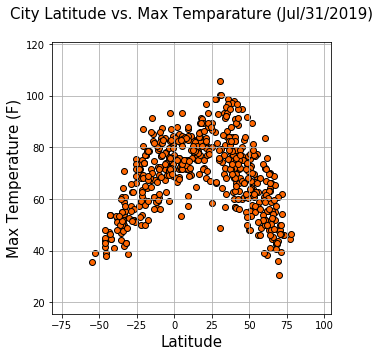

In [11]:
# define x, y axis
col = ["Lat", "Max Temp (F)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Max Temperature
color = (1, 0.4, 0)
alpha = 1
plot_setting(x,y, color, alpha)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel("Max Temperature (F)", fontsize = font)
plt.title(f"City Latitude vs. Max Temparature ({date})\n", fontsize = font)
plt.savefig("output_data/max_temp.png")
plt.show()

In [12]:
# Create a temp_df DataFrame for more indepth temperature analysis
cols = ["City", "Country", "Lat", "Max Temp (F)"]
temp_df = city_weather_now_df[cols].copy()
temp_df["Lat"] = temp_df["Lat"].astype("float")
temp_df["Max Temp (F)"] = temp_df["Max Temp (F)"].astype("float")

# ------------- binning------------- 
# bins
bin_width = 5
lat_min = round(temp_df["Lat"].min()) + bin_width
lat_max = round(temp_df["Lat"].max())

# to ensure the bins are symmetric around Equater
if abs(lat_min) > lat_max:
    lat_0 = lat_max
else: 
    lat_0 = -lat_min

bins_pos = list(np.arange(0, lat_0 + 1, bin_width)) 
bins_neg = [-x for x in bins_pos if x != 0]
bins_neg.sort()
bins = ([lat_range[0]] + bins_neg + bins_pos + [lat_range[1]])
print(f"neg_bins:{bins[:len(bins)//2]}\npos_bins:{bins[len(bins)//2 :]}")

# bins label
label_name = [f"({str(bins[i])}, {str(bins[i+1])}]" for i in range(len(bins) -1)]
label_name[0] = f"<= {bins[1]}"
label_name[-1] = f"> {bins[-2]}"

# create new col for binned results
temp_df["Lat_group"] = pd.cut(temp_df["Lat"], bins, labels=label_name)
temp_df.head()

neg_bins:[-90, -50.0, -45.0, -40.0, -35.0, -30.0, -25.0, -20.0, -15.0, -10.0, -5.0]
pos_bins:[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 90]


,City,Country,Lat,Max Temp (F),Lat_group
0,Liwale,TZ,-9.80,71.84,"(-10.0, -5.0]"
1,Mataura,NZ,-46.19,44.01,"(-50.0, -45.0]"
2,Peniche,PT,39.36,62.60,"(35.0, 40.0]"
3,Nouadhibou,MR,20.93,68.00,"(20.0, 25.0]"
4,Port Alfred,ZA,-33.59,59.00,"(-35.0, -30.0]"


In [13]:
# ------------- groupby, and calculate averege temp ------------- 
lat_temp_df = temp_df.groupby(["Lat_group"]).mean()["Max Temp (F)"]
avg_lat = ([(lat_min + bins[1])/2] + 
           [(bins[i] + bins[i+1])/2 for i in range(1, len(bins)-2)] + 
           [(lat_max + bins[-2])/2])
lat_temp_df = lat_temp_df.reset_index()
lat_temp_df["avg_lat"] = pd.Series(avg_lat)
lat_temp_df.head()

,Lat_group,Max Temp (F),avg_lat
0,<= -50.0,37.400000,-50.0
1,"(-50.0, -45.0]",42.855000,-47.5
2,"(-45.0, -40.0]",49.288571,-42.5
3,"(-40.0, -35.0]",50.088000,-37.5
4,"(-35.0, -30.0]",52.750400,-32.5


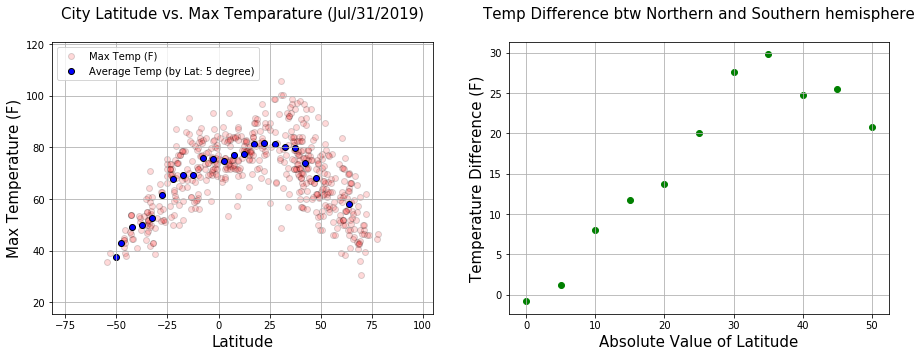

In [14]:
# Plot Tempareture Difference in Northern and Southern Hemisphere
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

# Plot temperature of all cities
ax1
# define x, y axis
col = ["Lat", "Max Temp (F)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]
color = 'red'
alpha = 0.15
ax1.scatter(x, y,facecolor = color, edgecolor = 'k', alpha = 0.15)
xrange = max(x) - min(x)
yrange = max(y) - min(y)
ax1.set_xlim(min(x) - xrange/5, max(x) + xrange/5)
ax1.set_ylim(min(y) - yrange/5, max(y) + yrange/5)

# plot average Temperature, every 5 degree lat
col = ["avg_lat", "Max Temp (F)"]
x = lat_temp_df[col[0]]
y = lat_temp_df[col[1]]
ax1.scatter(x, y, facecolor = 'blue', edgecolor = 'k', alpha = 1, 
            label = f"Average Temp (by Lat: {bin_width} degree)")

ax1.grid(True)
ax1.set_xlabel("Latitude", fontsize = font)
ax1.set_ylabel("Max Temperature (F)", fontsize = font)
ax1.legend(loc = "upper left")
ax1.set_title(f"City Latitude vs. Max Temparature ({date})\n", fontsize = font)


# Plot temperature difference between NORTHERN and SOUTHERN hemispheres
rows = lat_temp_df.count()["avg_lat"]
diff = []
for i in range(rows//2):
    df = (lat_temp_df.iloc[-i-1, 1] - lat_temp_df.iloc[i, 1])
    diff.append(df)
    
ax2.scatter(bins_pos, diff[::-1], facecolor = 'green', label = "Temp diff")
ax2.grid(True)
ax2.set_xlabel("Absolute Value of Latitude", fontsize = font)
ax2.set_ylabel("Temperature Difference (F)", fontsize = font)
ax2.set_title(f"Temp Difference btw Northern and Southern hemisphere\n", fontsize = font)

plt.tight_layout
plt.savefig("output_data/max_temp_compare.png")
plt.show()

#### Latitude vs. Humidity Plot

Average Humidity: 70.90 %
Max Humidity: 100.00 %
Number of city with less than 20% humidity: 14



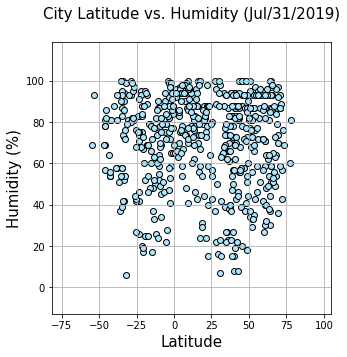

In [15]:
# define x, y axis
print("Average Humidity: {:.2f} %".format(city_weather_now_df['Humidity (%)'].mean()))
print("Max Humidity: {:.2f} %".format(city_weather_now_df['Humidity (%)'].max()))
print("Number of city with less than 20% humidity: {}\n".format(city_weather_now_df[city_weather_now_df
                                                                                    ['Humidity (%)'] 
                                                                          < 20].count()['City']))

col = ["Lat", "Humidity (%)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Humidity
color = (0.68, 0.9, 1)
alpha = 1
plot_setting(x,y,color,alpha)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Humidity ({date})\n", fontsize = font)
plt.savefig("output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

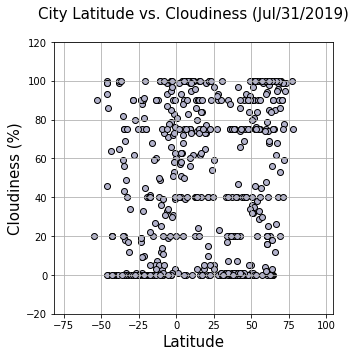

In [16]:
# define x, y axis
col = ["Lat", "Cloudiness (%)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Cloudiness
color = (0.7, 0.7, 0.8)
alpha = 1
plot_setting(x,y,color,alpha)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Cloudiness ({date})\n", fontsize = font)
plt.savefig("output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

Average Wind Speed: 7.74
Max Wind Speed: 27.13
Number of city with wind speed greater than 25 mph: 6



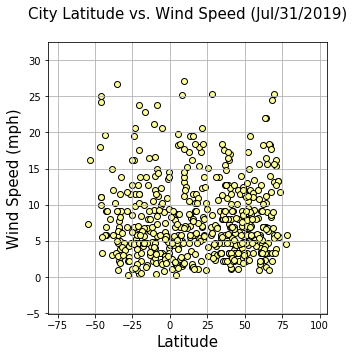

In [17]:
print("Average Wind Speed: {:.2f}".format(city_weather_now_df['Wind Speed (mph)'].mean()))
print("Max Wind Speed: {:.2f}".format(city_weather_now_df['Wind Speed (mph)'].max()))
print("Number of city with wind speed greater than 25 mph: {}\n".format(city_weather_now_df[city_weather_now_df
                                                                                    ['Wind Speed (mph)'] 
                                                                          > 25].count()['City']))

# define x, y axis
col = ["Lat", "Wind Speed (mph)"]

x = city_weather_now_df[col[0]]
y = city_weather_now_df[col[1]]

# plot Latitude vs. Wind Speed
color = (1, 1, 0.6)
alpha = 1
plot_setting(x,y,color,alpha)
plt.xlabel("Latitude", fontsize = font)
plt.ylabel(col[1], fontsize = font)
plt.title(f"City Latitude vs. Wind Speed ({date})\n", fontsize = font)
plt.savefig("output_data/wind_speed.png")
plt.show()